In [14]:
import numpy as np
import torch
from gen.simulations.lj import LJ
import h5py
import matplotlib.pyplot as plt

In [84]:
sys = LJ(periodic=True,boxlength=5)
with h5py.File('/global/cfs/cdirs/m4235/sherry/ml-boilerplate/logs/runs/LJ_50/0212/traj.h5', 'r') as f:
    traj = f['traj'][:]
    acc = f['acc'][:]

In [85]:
traj = torch.tensor(traj)

In [86]:
pair_vec =sys.pair_vec(traj[-1])
pair_dist = torch.linalg.norm(pair_vec,dim=-1)

In [75]:
traj_periodic = torch.remainder(torch.tensor(traj), sys.boxlength)

/tmp/ipykernel_2357721/3385405505.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  traj_periodic = torch.remainder(torch.tensor(traj), sys.boxlength)


In [87]:
pair_vec_periodic = sys.pair_vec(traj_periodic[-1])
pair_dist_periodic = torch.linalg.norm(sys.pair_vec(traj_periodic[-1]),dim=-1)

In [88]:
pair_vec.max()

tensor(2.4999)

In [89]:
(pair_vec_periodic - pair_vec).max()

tensor(4.9879)

In [90]:
(pair_dist_periodic-pair_dist).abs().max()

tensor(2.9295)

/tmp/ipykernel_2357721/951204944.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pot = sys.potential(torch.tensor(traj_periodic).flatten(0,1))


(array([  2.,   2.,   1.,   1.,   0.,   9.,   2.,   5.,  16.,   7.,   5.,
         13.,  11.,  20.,  23.,  36.,  35.,  45.,  55.,  50.,  80.,  58.,
         80., 110., 107., 158., 154., 192., 218., 252., 248., 322., 336.,
        381., 484., 439., 477., 610., 581., 648., 665., 744., 738., 818.,
        809., 952., 914., 936., 872., 948., 920., 845., 899., 849., 804.,
        860., 831., 764., 712., 638., 580., 539., 516., 460., 449., 383.,
        322., 318., 245., 219., 209., 168., 123., 116.,  98.,  84.,  83.,
         50.,  47.,  42.,  37.,  25.,  16.,  20.,  10.,   6.,  13.,   9.,
          6.,   7.,   0.,   3.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,
          1.]),
 array([-164.01434326, -163.49787903, -162.98139954, -162.4649353 ,
        -161.94847107, -161.43200684, -160.91552734, -160.39906311,
        -159.88259888, -159.36611938, -158.84965515, -158.33319092,
        -157.81671143, -157.30024719, -156.78378296, -156.26731873,
        -155.75083923, -155.234375  , -154.717

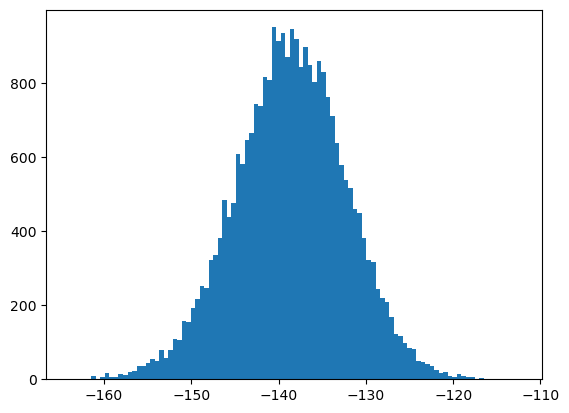

In [93]:
pot = sys.potential(torch.tensor(traj_periodic).flatten(0,1))
plt.hist(pot.numpy(), bins=100)

In [94]:
bins,g_r = sys.g_r(torch.tensor(traj).flatten(0,1),bins=np.linspace(0,5,100))

/tmp/ipykernel_2357721/3311824970.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bins,g_r = sys.g_r(torch.tensor(traj).flatten(0,1),bins=np.linspace(0,5,100))


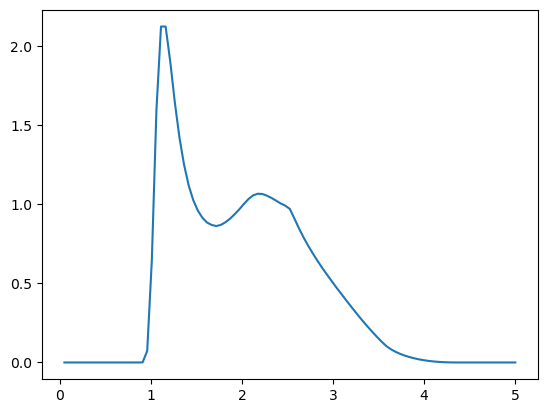

In [95]:
plt.plot(bins[1:],g_r)

In [96]:
mask = (acc>1)

In [97]:
proposal = traj[mask]

In [98]:
proposal.shape

torch.Size([2, 50, 3])

(array([ 6., 15.,  2.,  1.,  2.,  5.,  1.,  0.,  3.,  1.]),
 array([-158.81765747, -145.43890381, -132.06016541, -118.68141937,
        -105.30267334,  -91.92391968,  -78.54517365,  -65.16642761,
         -51.78768158,  -38.40893555,  -25.03018761]),
 <BarContainer object of 10 artists>)

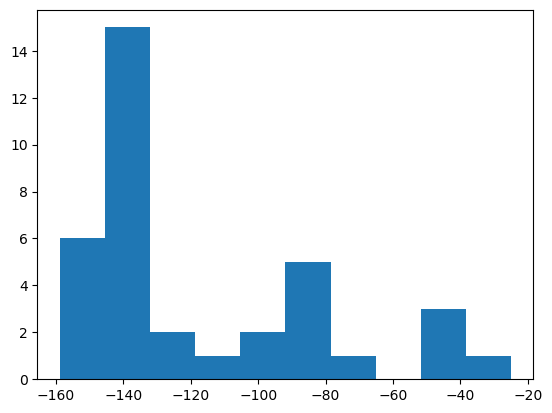

In [37]:
pot_proposal = sys.potential(torch.tensor(proposal))
plt.hist(pot_proposal.numpy(), bins=10)

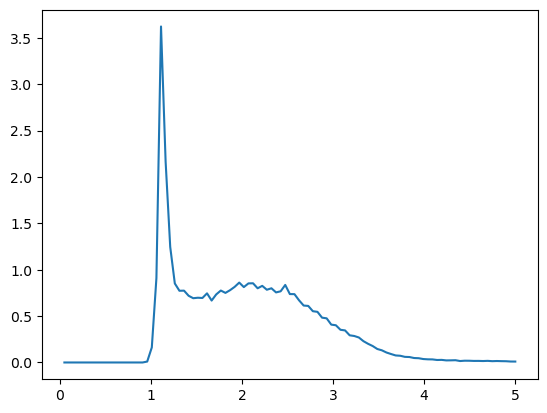

In [39]:
bins , g_r_proposal = sys.g_r(torch.tensor(proposal),bins=np.linspace(0,5,100))
plt.plot(bins[1:],g_r_proposal)